In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from physionet_utils import read_data_physionet_2, read_data_physionet_4, preprocess_physionet

In [2]:
unpickled_df = pd.read_pickle("/home/grads/z/zhale/ECG_SimCLR/challenge2017.pkl")  

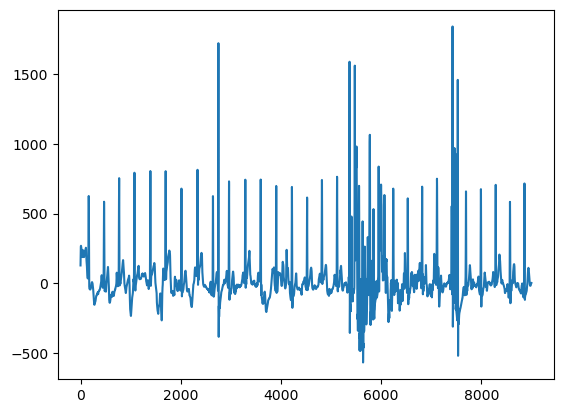

In [3]:
plt.plot(unpickled_df['data'][1])

(array([5076.,    0.,    0.,  758.,    0.,    0., 2415.,    0.,    0.,
         279.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

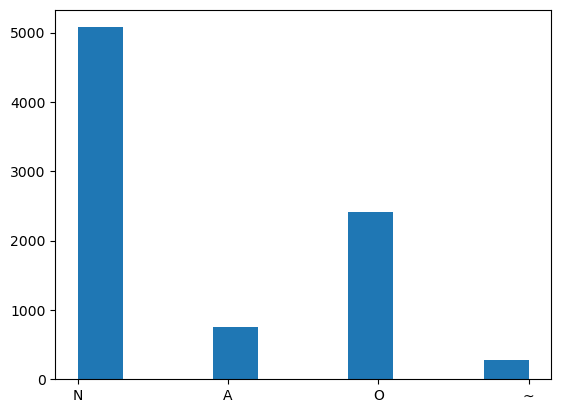

In [4]:
plt.hist(unpickled_df['label'])

In [27]:
X_train, X_test, Y_train, Y_test, pid_test = read_data_physionet_4()

before: 
Counter({0: 4560, 2: 2178, 1: 685, 3: 252}) Counter({0: 516, 2: 237, 1: 73, 3: 27})
after: 
Counter({2: 63996, 0: 60846, 1: 56062, 3: 42865}) Counter({0: 6988, 2: 6641, 1: 5619, 3: 5348})


In [29]:

X_train.shape

(223769, 1, 3000)

In [30]:
Y_train.shape

(223769,)

In [10]:
data = pd.read_csv(f"/ssd-shared/mimiciv-ecg-echonotes/physionet.org/files/mimic-iv-ecg/1.0/processed/potassium_w_ecg.csv")

In [11]:
data

,Unnamed: 0,Unnamed: 0.1,subject_id,hadm_id,stay_id,storetime,itemid,k_val,warning,segment_id,segment_time,segment_path,valid_flag,k_class,hyper
0,0,0,16441592,26033789,34777670,2177-05-04 17:20:00,227442,4.3,0,s40000306,2177-05-04 16:34:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0
1,1,1,14851532,28175270,32439246,2191-12-19 01:44:00,227442,3.5,0,s40000489,2191-12-19 01:05:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0
2,2,2,16850993,28533164,37573001,2168-03-25 14:40:00,227464,3.9,0,s40001231,2168-03-25 14:48:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0
3,3,3,13312271,28322922,38403387,2171-09-05 17:08:00,227442,4.2,0,s40001422,2171-09-05 15:59:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0
4,4,4,18264198,25425961,36278120,2149-03-30 00:10:00,227464,5.7,1,s40001588,2149-03-30 00:21:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,10489275,29292234,37768417,2139-05-25 11:29:00,227442,3.1,1,s40837674,2139-05-25 09:45:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,1,0
1996,1996,1996,14272587,23542267,30423736,2181-06-08 16:31:00,227442,3.7,0,s40837863,2181-06-08 14:36:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0
1997,1997,1997,19758310,29166385,30175373,2169-11-06 15:13:00,227464,4.4,0,s40837867,2169-11-06 15:39:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0
1998,1998,1998,14300794,22994645,38923222,2118-08-16 11:49:00,227442,4.1,0,s40838048,2118-08-16 08:08:00,/ssd-shared/mimiciv-ecg-echonotes/physionet.or...,1,0,0


In [12]:

machine_measurements = pd.read_csv(f"/ssd-shared/mimiciv-ecg-echonotes/physionet.org/files/mimic-iv-ecg/1.0/machine_measurements.csv")

/home/grads/z/zhale/miniconda3/envs/tfwgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
record_list = pd.read_csv(f"/ssd-shared/mimiciv-ecg-echonotes/physionet.org/files/mimic-iv-ecg/1.0/record_list.csv")

In [16]:
record_list

,subject_id,study_id,file_name,ecg_time,path
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630
2,10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311
3,10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959
4,10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569
...,...,...,...,...,...
800030,19999840,48683947,48683947,2164-09-12 12:28:00,files/p1999/p19999840/s48683947/48683947
800031,19999840,41842293,41842293,2164-09-17 11:31:00,files/p1999/p19999840/s41842293/41842293
800032,19999987,41190887,41190887,2145-11-02 19:54:00,files/p1999/p19999987/s41190887/41190887
800033,19999987,45828463,45828463,2145-11-03 03:00:00,files/p1999/p19999987/s45828463/45828463


In [28]:
machine_measurements_summary = pd.DataFrame()
machine_measurements_summary['report_0'] = machine_measurements['report_0'].unique()

In [ ]:
machine_measurements_summary[machine_measurements_summary['report_0'] == ]

In [44]:
pred = np.array([[0.1, 0.2, 0.8, 0.3], [0.1, 0.2, 0.8, 0.9]])
y = [2,3]
(np.argmax(pred,1) == y).mean()

1.0

In [35]:
np.argmax(pred) == 3

False

In [42]:
machine_measurements['report_0'].value_counts()

Sinus rhythm                                                                                                                          317278
Sinus rhythm.                                                                                                                          59739
Sinus bradycardia                                                                                                                      58924
Sinus tachycardia                                                                                                                      40528
Atrial fibrillation                                                                                                                    31961
                                                                                                                                       ...  
Sinus tachycardia with sinus arrhythmia with fusion complexes                                                                              1
Possible atri

In [63]:
sinus_rhythm = []
sinus_bradycardia = []
sinus_tachycardia = []
atrial_fibrillation  = []
data_warning = []
for r in machine_measurements['report_0']:
    if str(type(r))[8:-2] == 'float':
        print(r)
        continue
    if "sinus rhythm" in r.lower():
        sinus_rhythm.append(1)
    elif "sinus bradycardia" in r.lower():
        sinus_bradycardia.append(1)
    elif "sinus tachycardia" in r.lower():
        sinus_tachycardia.append(1)
    elif "atrial fibrillation" in r.lower():
        atrial_fibrillation.append(1)
    elif r == '--- Warning: Data quality may affect interpretation ---':
        data_warning.append(1)

nan


In [61]:
str(type(r))[8:-2] == 'float'

True

In [67]:
sinus_rhythm = np.array([0]*len(machine_measurements))
sinus_bradycardia = np.array([0]*len(machine_measurements))
sinus_tachycardia = np.array([0]*len(machine_measurements))
atrial_fibrillation = np.array([0]*len(machine_measurements))
data_warning = np.array([0]*len(machine_measurements))

In [69]:
for i, r in enumerate(machine_measurements["report_0"]):
    if str(type(r))[8:-2] == 'float':
        print(r)
        continue
    if "sinus rhythm" in r.lower():
        sinus_rhythm[i] = 1
    elif "sinus bradycardia" in r.lower():
        sinus_bradycardia[i] = 1
    elif "sinus tachycardia" in r.lower():
        sinus_tachycardia[i] = 1
    elif "atrial fibrillation" in r.lower():
        atrial_fibrillation[i] = 1
    elif r == "--- Warning: Data quality may affect interpretation ---":
        data_warning[i] = 1

nan


In [70]:

machine_measurements["sinus_rhythm"] = sinus_rhythm

In [71]:
machine_measurements

,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,sinus_rhythm
0,10000032,40689238,6848296,2180-07-23 08:44:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,659,40,128,170,258,518,81,77,79,1
1,10000032,44458630,6848296,2180-07-23 09:54:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,722,40,124,162,246,504,77,75,70,1
2,10000032,49036311,6376932,2180-08-06 09:07:00,Sinus tachycardia,NaN,Normal ECG except for rate,NaN,NaN,NaN,...,600,40,130,162,244,474,79,72,77,0
3,10000117,45090959,6214760,2181-03-04 17:14:00,Sinus rhythm,NaN,Normal ECG,NaN,NaN,NaN,...,659,40,146,180,254,538,79,66,69,1
4,10000117,48446569,6632385,2183-09-18 13:52:00,Sinus rhythm,NaN,NaN,NaN,NaN,NaN,...,659,368,29999,504,590,868,84,80,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800030,19999840,48683947,6283529,2164-09-12 12:28:00,Sinus rhythm.,Left axis deviation,NaN,Borderline ECG,NaN,NaN,...,659,40,154,182,266,560,38,-39,35,1
800031,19999840,41842293,6947865,2164-09-17 11:31:00,Accelerated idioventricular rhythm.,Left axis deviation,IV conduction defect,Inferior infarct - age undetermined,Ant/septal and lateral ST-T changes suggest my...,Low QRS voltages in limb leads,...,967,29999,29999,200,350,688,29999,-80,174,0
800032,19999987,41190887,6848296,2145-11-02 19:54:00,Sinus tachycardia with PVC(s).,Possible right atrial abnormality,Inferior and lateral ST elevation - possible e...,NaN,Borderline ECG,NaN,...,526,40,148,204,286,528,58,50,51,0
800033,19999987,45828463,6315641,2145-11-03 03:00:00,Sinus rhythm.,NaN,Normal ECG,NaN,NaN,NaN,...,631,40,156,202,282,570,59,54,56,1


In [36]:
fr = []
count = []
arterial
for r in machine_measurements_summary['report_0']:
    count.append(len(machine_measurements[machine_measurements['report_0'] == r]))
    fr.append(len(machine_measurements[machine_measurements['report_0'] == r])/len(machine_measurements))
machine_measurements_summary['count'] = count
machine_measurements_summary['frequency'] = fr

In [37]:
machine_measurements_summary

,report_0,frequency,count
0,Sinus rhythm,0.396580,317278
1,Sinus tachycardia,0.050658,40528
2,Sinus rhythm with PAC(s).,0.003026,2421
3,Sinus bradycardia,0.073652,58924
4,Sinus bradycardia with interpolated PVC(s),0.000159,127
...,...,...,...
1566,Sinus rhythm with frequent PVCs with PACs with...,0.000001,1
1567,Sinus bradycardia with sinus arrhythmia with i...,0.000001,1
1568,Sinus rhythm with PAC(s) with PVC(s).,0.000001,1
1569,Sinus tachycardia with frequent multifocal PVC...,0.000001,1


In [41]:
machine_measurements_summary.to_csv("machine_measurements_summary.csv", index = False)

In [21]:
machine_measurements_summary = pd.read_csv(f"/ssd-shared/mimiciv-ecg-echonotes/physionet.org/files/mimic-iv-ecg/1.0/processed/machine_measurements_abnormality_v2.csv")

/home/grads/z/zhale/miniconda3/envs/tfwgpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
machine_measurements_summary.describe()

,subject_id,study_id,cart_id,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,...,t_axis,subject_id.1,study_id.1,file_name,sinus_rhythm,sinus_bradycardia,sinus_tachycardia,atrial_fibrillation,data_warning,valid_bit
count,8.000060e+05,8.000060e+05,8.000060e+05,800006.000000,800006.000000,800006.000000,800006.000000,800006.000000,800006.000000,800006.000000,...,800006.000000,8.000060e+05,8.000060e+05,8.000060e+05,800006.000000,800006.000000,800006.000000,800006.000000,800006.000000,800006.000000
mean,1.500321e+07,4.499990e+07,6.579541e+06,865.577878,4702.972723,8745.319486,283.425847,391.624552,688.607585,4957.453260,...,192.514777,1.500321e+07,4.499990e+07,4.499990e+07,0.561862,0.121114,0.083232,0.098016,0.008849,0.998893
std,2.877975e+06,2.883677e+06,2.625474e+05,1218.530393,10805.162818,13517.491926,1124.242781,1240.209913,1208.600297,11131.452494,...,2161.895655,2.877975e+06,2.883677e+06,2.883677e+06,0.496159,0.326260,0.276233,0.297336,0.093650,0.033261
min,1.000003e+07,4.000002e+07,6.037973e+06,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,-31248.000000,...,-32768.000000,1.000003e+07,4.000002e+07,4.000002e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250369e+07,4.250400e+07,6.376932e+06,681.000000,40.000000,144.000000,186.000000,276.000000,566.000000,37.000000,...,16.000000,1.250369e+07,4.250400e+07,4.250400e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.500041e+07,4.499738e+07,6.632385e+06,810.000000,40.000000,158.000000,200.000000,302.000000,610.000000,56.000000,...,42.000000,1.500041e+07,4.499739e+07,4.499739e+07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.749698e+07,4.749755e+07,6.762207e+06,937.000000,326.000000,29999.000000,230.000000,346.000000,668.000000,73.000000,...,68.000000,1.749698e+07,4.749755e+07,4.749755e+07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.999999e+07,4.999999e+07,6.998078e+06,65535.000000,29999.000000,61440.000000,29999.000000,65534.000000,29999.000000,32767.000000,...,32767.000000,1.999999e+07,4.999999e+07,4.999999e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
sum(machine_measurements_summary['valid_bit'])/len(machine_measurements_summary)

0.9988925083061877

In [26]:
len(machine_measurements_summary[machine_measurements_summary['valid_bit']==0])

886

(array([   886.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 799120.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

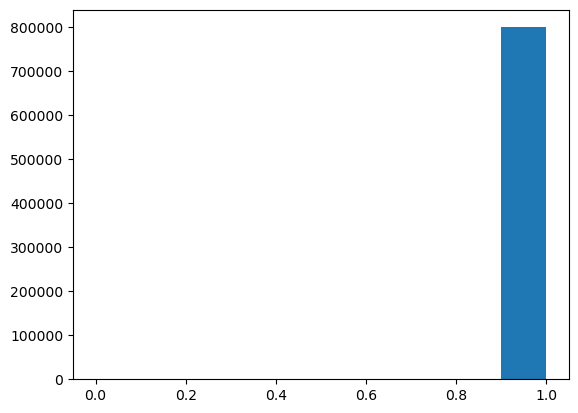

In [24]:
plt.hist(machine_measurements_summary['valid_bit'])

In [15]:
label = []
for i in tqdm(range(len(machine_measurements_summary))):
    if machine_measurements_summary.iloc[i]['sinus_rhythm'] == 1:
        label.append('sinus_rhythm')
    elif machine_measurements_summary.iloc[i]['sinus_bradycardia'] == 1:
        label.append('sinus_bradycardia')
    elif machine_measurements_summary.iloc[i]['sinus_tachycardia'] == 1:
        label.append('sinus_tachycardia')
    elif machine_measurements_summary.iloc[i]['atrial_fibrillation'] == 1:
        label.append('atrial_fibrillation')
    else:
        label.append('other')

100%|██████████| 800006/800006 [03:09<00:00, 4217.35it/s]


In [16]:
machine_measurements_summary['abnormality_label'] = label

(array([449493.,      0.,  66586.,      0.,      0.,  96892.,      0.,
        108622.,      0.,  78413.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

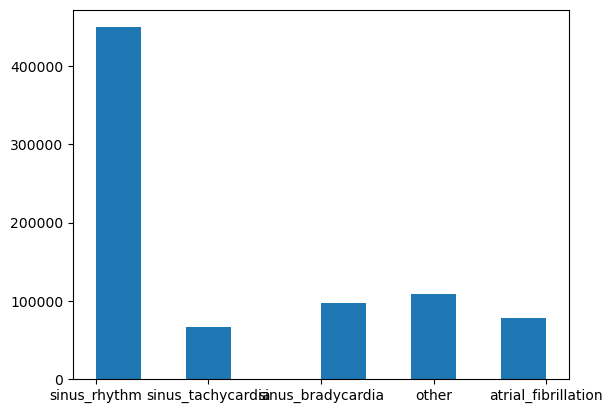

In [18]:
plt.hist(machine_measurements_summary['abnormality_label'])

In [20]:
machine_measurements_summary.to_csv(
    f"/ssd-shared/mimiciv-ecg-echonotes/physionet.org/files/mimic-iv-ecg/1.0/processed/machine_measurements_abnormality_v1.csv",
    index=False,
)

In [21]:
(machine_measurements.isna().sum()/len(machine_measurements))*100

subject_id      0.000000
study_id        0.000000
cart_id         0.000000
ecg_time        0.000000
report_0        0.000125
report_1       24.864787
report_2       34.264376
report_3       50.808277
report_4       71.557494
report_5       84.724168
report_6       92.984682
report_7       97.203872
report_8       99.092415
report_9       99.709013
report_10      99.887755
report_11      99.949877
report_12      99.975876
report_13      99.987126
report_14      99.994750
report_15      99.997625
report_16      99.998625
report_17      99.999625
bandwidth       0.000000
filtering       0.000000
rr_interval     0.000000
p_onset         0.000000
p_end           0.000000
qrs_onset       0.000000
qrs_end         0.000000
t_end           0.000000
p_axis          0.000000
qrs_axis        0.000000
t_axis          0.000000
dtype: float64